In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
# import pickle
# from mpl_toolkits.mplot3d import Axes3D
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [7]:
# codingscheme = filepath_down = "../data_tables/hs_rs_downlink"
codingscheme = filepath_up = "../data_tables/hs_rs_uplink"
protocolbit = 4*10**4
protocol_target = 10**(-9)

In [4]:
start_node = 2
end_node = 36

In [5]:
tSNR_range = np.arange(0, 92, 1)
rSNR1_range = np.arange(-1, 7, 0.01)

In [15]:
%%time
# res = np.zeros((35-2+1, 4))

# tSNR_range = np.arange(5, 90, 1)
# rSNR1_range = np.arange(-1, 5, 0.01)

for N in xrange(35, 1, -1):
    filename = codingscheme + '/n' + str(N) + '.in'
    downTable = load_table(filename)
    downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    tSNR_range = np.arange(downlink_dct[N][0], 92, 0.01)
#     tSNR_range = np.arange(downlink_dct[N][0], downlink_dct[N][1], 0.01)
    rSNR1_range = np.arange(np.floor(downlink_dct[N][1]), np.ceil(downlink_dct[N][1]), 0.01)
    
    pa2 = 0.1*protocol_target
    rSNR2 = downTable[0][np.where(np.array(downTable[1])<=pa2)[0][0]]

    res[N-2] = down_fade_gap_inner(N, downfunc, protocol_target, tSNR_range, rSNR1_range, rSNR2, pa2)
    print res[N-2]

[ 35.    13.59   4.91  10.91]
[ 34.    13.72   4.98  10.92]
[ 33.    13.84   4.98  10.92]
[ 32.    13.97   4.96  10.92]
[ 31.    14.9    3.99  10.93]
[ 30.    11.87   3.63   8.27]
[ 29.    12.45   2.99   8.29]
[ 28.    12.74   2.99   8.31]
[ 27.    11.13   2.94   6.87]
[ 26.    11.34   2.99   6.89]
[ 25.    11.57   2.98   6.91]
[ 24.    10.92   2.41   5.95]
[ 23.    11.52   1.99   5.97]
[ 22.    10.83   1.97   5.28]
[ 21.    11.15   1.99   5.31]
[ 20.    10.9    1.81   4.77]
[ 19.    11.28   1.94   4.83]
[ 18.    11.22   1.68   4.39]
[ 17.    11.94   0.99   4.05]
[ 16.    11.64   0.99   3.73]
[ 15.    11.94   1.43   3.8 ]
[ 14.    12.07   0.99   3.3 ]
[ 13.    12.43   0.99   3.11]
[ 12.    12.98   0.98   2.98]
[ 11.    13.48   0.87   2.68]
[ 10.    14.18   0.72   2.44]
[  9.    14.97   0.53   2.11]
[  8.    16.12   0.5    1.9 ]
[  7.    17.5    0.28   1.55]
[  6.00000000e+00   1.98100000e+01  -1.00000000e-02   1.33000000e+00]
[  5.00000000e+00   2.23200000e+01  -1.00000000e-02   1.0300

In [13]:
# downlink_dct = {}

for N_array in res:
    N = N_array[0]
    if not np.isnan(N):
#         tmp = N_array[1] - 1 if N_array[1] % 10 == 0 else N_array[1]
        downlink_dct[N] = (N_array[1] - 0.1, N_array[2])

In [14]:
print downlink_dct

{2.0: (46.300000000000004, -0.42999999999999949), 3.0: (33.200000000000003, -0.29999999999999938), 4.0: (26.400000000000006, -0.16999999999999926), 5.0: (22.300000000000004, -0.059999999999999165), 6.0: (19.800000000000011, -0.029999999999999138), 7.0: (17.400000000000006, 0.28000000000000003), 8.0: (16.100000000000001, 0.34000000000000002), 9.0: (14.899999999999997, 0.47000000000000003), 10.0: (14.1, 0.67000000000000004), 11.0: (13.399999999999999, 0.80000000000000004), 12.0: (12.899999999999997, 0.93000000000000005), 13.0: (12.399999999999999, 0.88), 14.0: (12.0, 0.95000000000000007), 15.0: (11.899999999999997, 1.2900000000000003), 16.0: (11.599999999999998, 0.95000000000000007), 17.0: (11.899999999999997, 0.97999999999999998), 18.0: (11.199999999999999, 1.4900000000000004), 19.0: (11.199999999999999, 1.8700000000000008), 20.0: (10.799999999999997, 1.8100000000000007), 21.0: (11.1, 1.9100000000000008), 22.0: (10.799999999999997, 1.8300000000000007), 23.0: (11.499999999999998, 1.94000

In [16]:
lt_fadegap_2 = res

In [17]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

hsrsscheme = codingscheme
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

CPU times: user 4.91 s, sys: 52.9 ms, total: 4.96 s
Wall time: 5.26 s


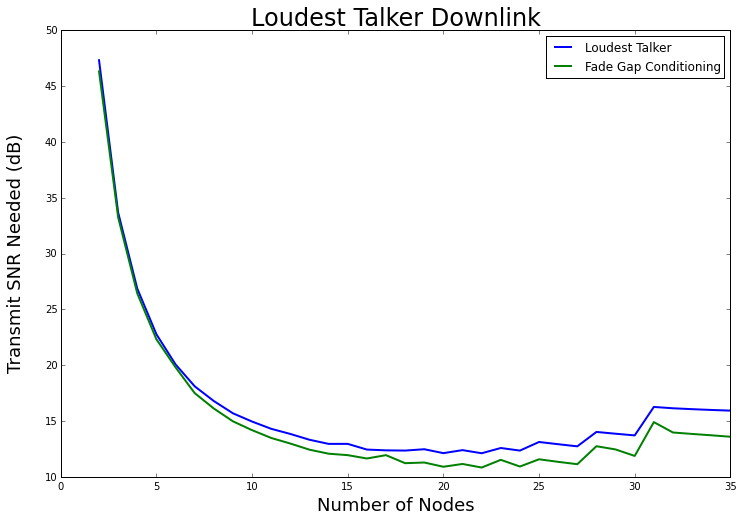

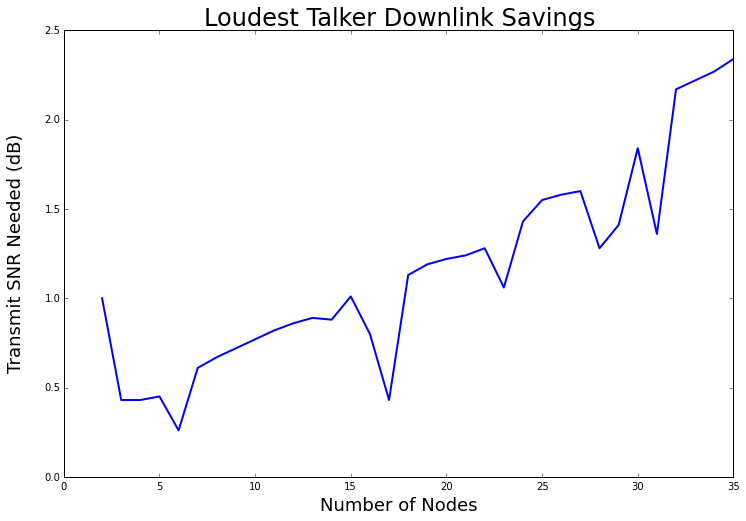

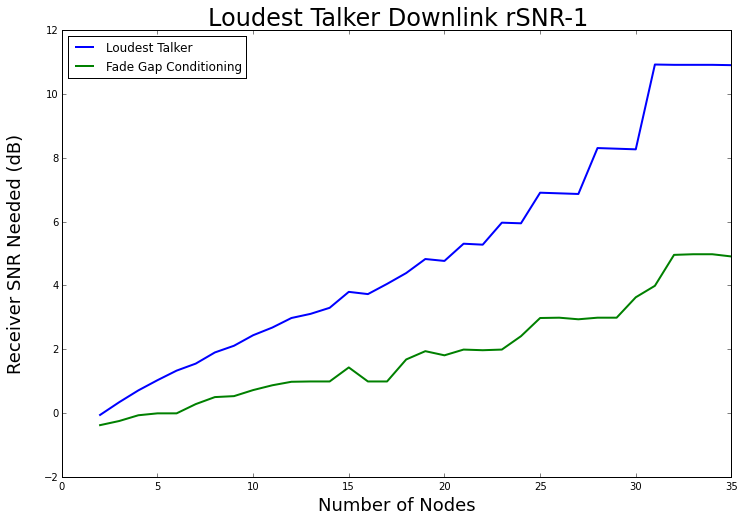

In [18]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_down, lw=2.0, label='Loudest Talker')
# plot(user_range, lt_fadegap_1[:,1], lw=2.0, label='Fade Gap No C')
plot(user_range, lt_fadegap_2[:,1], lw=2.0, label='Fade Gap Conditioning')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Downlink', fontsize=24)
savefig('loudest_talker_comparison_2.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, hsrs_down-lt_fadegap_2[:,1], lw=2.0, label='Loudest Talker')
# legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Downlink Savings', fontsize=24)
savefig('loudest_talker_savings_2.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, lt_fadegap_2[:,3], lw=2.0, label='Loudest Talker')
# plot(user_range, lt_fadegap_1[:,2], lw=2.0, label='Fade Gap No C')
plot(user_range, lt_fadegap_2[:,2], lw=2.0, label='Fade Gap Conditioning')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Receiver SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Downlink rSNR-1', fontsize=24)
savefig('loudest_talker_rSNR)2.pdf', bbox='tight')

In [19]:
r_probs = np.zeros((35-2+1, 2))

for N in range(2, 36, 1):
    idx = N - 2
    rSNR1, rSNR2 = lt_fadegap_2[idx,2], lt_fadegap_2[idx, 3]
    
    filename = codingscheme + '/n' + str(N) + '.in'
    downTable = load_table(filename)
    downfunc = interp1d(downTable[0], downTable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))

    p1, p2 = downfunc(rSNR1), downfunc(rSNR2)
    r_probs[idx] = np.array([p1, p2])
    
print r_probs

[[  4.73456788e-07   8.53904883e-11]
 [  1.80365344e-05   8.57297236e-11]
 [  7.76786102e-05   8.20523023e-11]
 [  5.58711539e-04   8.78865381e-11]
 [  3.47648369e-03   9.27101093e-11]
 [  9.38643279e-04   9.93763442e-11]
 [  1.19828780e-03   9.01178423e-11]
 [  2.39652496e-03   9.82744682e-11]
 [  3.23908720e-03   9.34276388e-11]
 [  3.42918462e-03   9.76405857e-11]
 [  5.37559651e-03   8.82310074e-11]
 [  6.99696374e-03   9.97709874e-11]
 [  1.22674987e-02   9.98123167e-11]
 [  7.56645758e-03   9.11741028e-11]
 [  2.95119916e-02   9.89331670e-11]
 [  6.14546086e-02   9.68662808e-11]
 [  1.05650927e-02   9.53109633e-11]
 [  1.22335946e-02   9.42986035e-11]
 [  1.29909439e-02   9.41771316e-11]
 [  2.32486246e-02   9.57194967e-11]
 [  2.04095247e-02   9.59293237e-11]
 [  6.24055799e-02   9.90854435e-11]
 [  1.66790179e-02   9.30343943e-11]
 [  1.96833780e-02   9.98551662e-11]
 [  1.64991134e-02   9.74022701e-11]
 [  1.61367340e-02   9.39606913e-11]
 [  9.37641114e-02   9.75603960e-11]
 

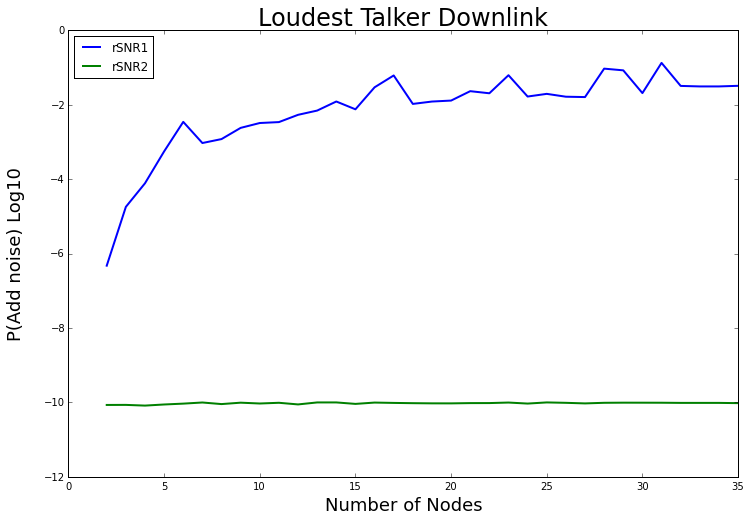

In [20]:
figure(figsize=(12, 8))
plot(user_range, np.log10(r_probs[:,0]), lw=2.0, label='rSNR1')
plot(user_range, np.log10(r_probs[:,1]), lw=2.0, label='rSNR2')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('P(Add noise) Log10', fontsize=18, labelpad=20)
title('Loudest Talker Downlink', fontsize=24)
savefig('loudest_talker_rprobs_2.pdf', bbox='tight')